In [1]:
import tweepy
import csv
import numpy as np
import re
import string

In [2]:
#methods and stopwords text preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

#creating a set of stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#Twitter API credentials
consumer_key = "y5ZQviBRnS9vFpRmsmmHz48ZM"
consumer_secret = "dRphnSjVNnefatCG8PbcPGiAibYYv9lTxRzQW3ZXB3sflbEfVE"
access_key = "1355060918342676482-IVq97IsGVQJ5RfrBzxW3q3Ou1C0NCL"
access_secret = "GlXrMLNpcxR2pqBVqE42zwsHgCxgb9p57EFsTL1dIoVNQ"

In [5]:
def get_all_tweets(screen_name):
    
    
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
   
    alltweets = []  
    
    
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    
    alltweets.extend(new_tweets)
    
    
    oldest = alltweets[-1].id - 1
    
    
    while len(new_tweets) > 0:
        print(f"getting tweets before {oldest}")
        
        
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        
        alltweets.extend(new_tweets)
        
        
        oldest = alltweets[-1].id - 1
        
        print(f"...{len(alltweets)} tweets downloaded so far")
    
     
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    #print(outtweets)
     
    with open(f'new_{screen_name}_tweets.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)
    
    pass


if __name__ == '__main__':
    
    get_all_tweets("Avengers")

getting tweets before 1161385895133454336
...400 tweets downloaded so far
getting tweets before 1161320835338113023
...600 tweets downloaded so far
getting tweets before 1161311639968387072
...800 tweets downloaded so far
getting tweets before 1161308839884546047
...1000 tweets downloaded so far
getting tweets before 1153000698570821631
...1200 tweets downloaded so far
getting tweets before 1152985475902255105
...1400 tweets downloaded so far
getting tweets before 1152983045533851648
...1600 tweets downloaded so far
getting tweets before 1152981857790779391
...1800 tweets downloaded so far
getting tweets before 1152980903146266623
...2000 tweets downloaded so far
getting tweets before 1152980127934046208
...2200 tweets downloaded so far
getting tweets before 1152979228813594628
...2400 tweets downloaded so far
getting tweets before 1152978160197275652
...2600 tweets downloaded so far
getting tweets before 1152973433623519236
...2800 tweets downloaded so far
getting tweets before 115263

In [6]:
import pandas as pd
df = pd.read_csv("new_Avengers_tweets.csv", encoding= 'unicode_escape')
df.head()

,id,created_at,text
0,1385337673963905024,2021-04-22 21:00:14,b'RT @Avengers: @theblackpanther @CaptainAmeri...
1,1385337618225934336,2021-04-22 21:00:01,b'@theblackpanther @CaptainAmerica @MarvelStud...
2,1385322870469849093,2021-04-22 20:01:25,b'RT @Avengers: @theblackpanther @CaptainAmeri...
3,1385322520958709761,2021-04-22 20:00:01,b'@theblackpanther @CaptainAmerica @MarvelStud...
4,1385277672440295426,2021-04-22 17:01:48,b'RT @Avengers: @MarvelStudios @CaptainAmerica...


In [7]:
df.shape

(3259, 3)

In [8]:
df.dtypes

id            object
created_at    object
text          object
dtype: object

In [9]:
emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)  

def remove_emoji(string):
    return emoji_pattern.sub(r'', str(string))


df['text'] = df['text'].apply(remove_emoji) # Apply the remove_emoji function to each row in the text column

In [10]:
# Removing links
import re

def remove_links(text):
    url_reg  = r'[a-z]*[:.]+\S+'
    return re.sub(url_reg, '', text)

df['text'] = df['text'].apply(remove_links) 

In [11]:
# https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0
import re
# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

df['text'] = df['text'].apply(remove_special_characters) 

In [12]:
# https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0
import unicodedata
# function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text
# call function
df['text'] = df['text'].apply(remove_accented_chars) 

In [13]:
# https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0
import string
# function to remove punctuation
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text

df['text'] = df['text'].apply(remove_punctuation) 

In [14]:
# https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0
import re
# function to remove special characters
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()
# call function
df['text'] = df['text'].apply(remove_extra_whitespace_tabs)

In [15]:
#text=df['text']

def preprocess(text):
    #removing numbers
    text=''.join(n for n in text if not n.isdigit())
    #convert all the text to lower case
    text=text.lower()
    #remove urls
    text=re.sub(r"http\S+|www\S+|https\S+","",text,flags=re.MULTILINE)
    #MULTILINE flag tells python to make the ‘^’ and ‘$’ 
    #special characters match the start or end of any line within a string.
    
    #remove punctuations
    text=text.translate(str.maketrans("","",string.punctuation))
    
    #remove @ and #
    text=re.sub(r'\@\w+\|\#',"",text)
    
    #removing stopwords
    tweet_tokens= word_tokenize(text)
    filtered_words=[words for words in tweet_tokens if words not in stop_words]
    
    #stemming
    ps=PorterStemmer()
    stem=[ps.stem(w)for w in filtered_words]
    
    #lemmatization
    lemmatizer=WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w,pos='a')for w in stem]
    
    return " ".join(lemma_words)

df['text'] = df['text'].apply(preprocess)

In [16]:
tweets = df["text"]
all_words = []
for index, tweet in tweets.iteritems(): 
    all_words.extend(tweet.split(' '))
all_words

['brt',
 'aveng',
 'theblackpanth',
 'captainamerica',
 'marvelstudio',
 'falconandwint',
 'disneyplu',
 'ill',
 'experi',
 'moment',
 'btheblackpanth',
 'captainamerica',
 'marvelstudio',
 'falconandwint',
 'disneyplu',
 'ill',
 'experi',
 'mo',
 'brt',
 'aveng',
 'theblackpanth',
 'captainamerica',
 'marvelstudio',
 'falconandwint',
 'disneyplu',
 'falconandwintersoldierfinal',
 'btheblackpanth',
 'captainamerica',
 'marvelstudio',
 'falconandwint',
 'disneyplu',
 'falconandwintersoldierfinal',
 'brt',
 'aveng',
 'marvelstudio',
 'captainamerica',
 'falconandwint',
 'disneyplu',
 'android',
 'nan',
 'nan',
 'nan',
 'bmarvelstudio',
 'captainamerica',
 'falconandwint',
 'disneyplu',
 'android',
 'nan',
 'nan',
 'nan',
 'brt',
 'falconandwint',
 'epic',
 'falconandwintersoldierfinal',
 'almost',
 'celebr',
 'marvel',
 'studio',
 'marathon',
 'disneyplu',
 'bwatch',
 'brand',
 'new',
 'teaser',
 'trailer',
 'marvel',
 'studio',
 'shangchi',
 'legend',
 'ten',
 'ring',
 'experi',
 'brt',

In [17]:
from collections import Counter
counts = Counter(all_words)
print(counts)

Counter({'marvel': 1781, 'take': 1078, 'challeng': 1077, 'booth': 1036, 'head': 927, 'click': 784, 'avengersendgam': 780, 'selfi': 733, 'front': 670, 'us': 655, 'tell': 645, 'video': 645, 'hasbro': 625, 'youv': 604, 'final': 507, 'one': 500, 'miss': 403, 'tweet': 397, 'next': 375, 'back': 371, 'photo': 370, 'sorri': 347, 'complet': 340, 'congrat': 338, 'pleas': 337, 'movi': 315, 'verifi': 309, 'giveaway': 306, 'still': 306, 'enjoy': 306, 'time': 281, 'see': 272, 'info': 271, 'mani': 268, 'get': 264, 'success': 259, 'seen': 257, 'share': 253, 'first': 250, 'surpris': 246, 'alltim': 245, 'whatev': 237, 'studio': 223, 'prize': 220, 'go': 169, 'collect': 153, 'commemor': 149, 'box': 149, 'originalfunko': 146, 'avengersendgamesweep': 136, 'marvelstudio': 135, 'love': 132, 'way': 130, 'famili': 129, 'wall': 128, 'deliveri': 127, 'gather': 126, 'friend': 126, 'battl': 116, 'fan': 114, 'win': 109, 'soon': 107, 'free': 107, 'chanc': 107, 'check': 105, 'your': 105, 'hey': 104, 'earli': 104, 'stu

In [18]:
counts.most_common(10)

[('marvel', 1781),
 ('take', 1078),
 ('challeng', 1077),
 ('booth', 1036),
 ('head', 927),
 ('click', 784),
 ('avengersendgam', 780),
 ('selfi', 733),
 ('front', 670),
 ('us', 655)]

In [19]:
type(all_words)

list

## Wordcloud


In [20]:
final_words = ' '.join(all_words)

In [21]:
type(final_words)

str

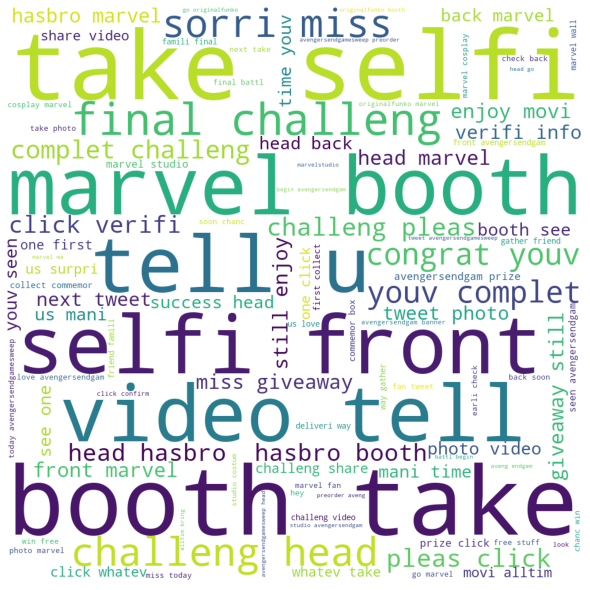

In [22]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(final_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()